**Emozify**

---



---

![alt text](https://cdn0.tnwcdn.com/wp-content/blogs.dir/1/files/2015/05/emoji-love-730x411.jpg)


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
pip install emoji

In [4]:
import numpy as np
from emoji_util import *
import emoji
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
np.random.seed(1)

%matplotlib inline

Using TensorFlow backend.


In [0]:
train_data=pd.read_csv('/content/drive/My Drive/emojify/train_emoji.csv')
X_train=train_data['text']
Y_train=train_data['label']

test_data=pd.read_csv('/content/drive/My Drive/emojify/tesss.csv')
X_test=test_data['text']
Y_test=test_data['labels']

In [6]:

Y_test=np.array(Y_test)
Y_train=np.array(Y_train)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((132,), (132,), (56,), (56,))

In [7]:
maxlen=len(max(X_train,key=len).split())
maxlen

10

In [8]:
for idx in range(5):
  print(X_train[idx],label_to_emoji(Y_train[idx]))

never talk to me again 😞
I am proud of your achievements 😄
It is the worst day in my life 😞
Miss you so much ❤️
food is life 🍴


In [9]:
#convert labels to its One hot representation
Y_oh_train=convert_to_one_hot(Y_train,C=5)
Y_oh_test=convert_to_one_hot(Y_test,C=5)
Y_oh_train[:5]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [0]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('/content/drive/My Drive/emojify/glove.6B.50d.txt')

In [0]:
#Convert Sentence to index
def sentences_to_indices(X, word_to_index, max_len):
    m = X.shape[0]                         
    X_indices =np.zeros((m,max_len))
    for i in range(m):                              
        sentence_words =[w.lower() for w in X[i].split()]
        j = 0
        for w in sentence_words:
            X_indices[i, j] =word_to_index[w]
            j =j+1
    return X_indices

In [0]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    vocab_len = len(word_to_index) + 1                  
    emb_dim = word_to_vec_map["cucumber"].shape[0]      
    emb_matrix = np.zeros((vocab_len,emb_dim))
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]
    embedding_layer =Embedding(vocab_len,emb_dim, trainable=False) 
    embedding_layer.build((None,)) 
    embedding_layer.set_weights([emb_matrix])
    return embedding_layer

In [0]:
def Emojify_V2(input_shape, word_to_vec_map, word_to_index):
    sentence_indices =Input(shape=input_shape,dtype="int32")
    embedding_layer =pretrained_embedding_layer(word_to_vec_map, word_to_index)
    embeddings =embedding_layer(sentence_indices)
    X =LSTM(units=128,return_sequences=True)(embeddings)
    X = Dropout((0.5))(X)
    X = LSTM(units=128,return_sequences=False)(X)
    X = Dropout((0.5))(X)
    X = Dense(5)(X)
    X =Activation('softmax')(X)
    model = Model(inputs=sentence_indices,outputs=X)
    return model

In [15]:
model = Emojify_V2((maxlen,), word_to_vec_map, word_to_index)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 128)           91648     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645 

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxlen)
Y_train_oh = convert_to_one_hot(Y_train, C = 5)
X_train_indices.shape,Y_train_oh.shape

((132, 10), (132, 5))

In [18]:
model.fit(X_train_indices, Y_train_oh, epochs = 50, batch_size = 32, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
132/132 [==============================] - 3s 22ms/step - loss: 1.5890 - acc: 0.2652
Epoch 2/50
132/132 [==============================] - 0s 1ms/step - loss: 1.5390 - acc: 0.3030
Epoch 3/50
132/132 [==============================] - 0s 1ms/step - loss: 1.4704 - acc: 0.3712
Epoch 4/50
132/132 [==============================] - 0s 2ms/step - loss: 1.4399 - acc: 0.3939
Epoch 5/50
132/132 [==============================] - 0s 1ms/step - loss: 1.3696 - acc: 0.4773
Epoch 6/50
132/132 [==============================] - 0s 1ms/step - loss: 1.2215 - acc: 0.5227
Epoch 7/50
132/132 [==============================] - 0s 1ms/step - loss: 1.1347 - acc: 0.5379
Epoch 8/50
132/132 [==============================] - 0s 1ms/step - loss: 0.9987 - acc: 0.6136
Epoch 9/50
132/132 [==============================] - 0s 1ms/step - loss: 0.9660 - acc: 0.6667
Epoch 10/50
132/132 [===========================

In [19]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxlen)
Y_test_oh = convert_to_one_hot(Y_test, C = 5)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)

56/56 [==============================] - 0s 4ms/step

Test accuracy =  0.8928571513720921


In [20]:

C = 5
y_test_oh = np.eye(C)[Y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, maxlen)
pred = model.predict(X_test_indices)
for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != Y_test[i]):
        print('Expected emoji:'+ label_to_emoji(Y_test[i]) + ' prediction: '+ X_test[i] + label_to_emoji(num).strip())

Expected emoji:😄 prediction: she got me a nice present	❤️
Expected emoji:😞 prediction: work is hard	😄
Expected emoji:😞 prediction: This girl is messing with me	❤️
Expected emoji:😞 prediction: she is a bully	❤️
Expected emoji:😞 prediction: go away	⚾
Expected emoji:😞 prediction: yesterday we lost again	⚾


In [21]:
  
x_test = np.array(['not feeling happy'])
X_test_indices = sentences_to_indices(x_test, word_to_index, maxlen)
print(x_test[0] +' '+  label_to_emoji(np.argmax(model.predict(X_test_indices))))

not feeling happy 😞


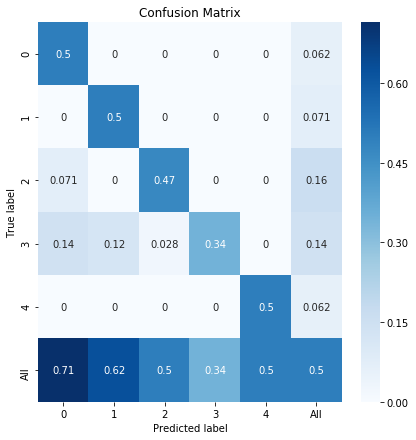

In [22]:
    #plot confusion matrix
    X_test_indices = sentences_to_indices(X_test, word_to_index, maxlen)
    pred_test=np.argmax(model.predict(X_test_indices),axis=1)
    df_confusion = pd.crosstab(Y_test, pred_test.reshape(pred_test.shape[0],), rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    df_conf_norm = df_confusion / df_confusion.sum(axis=1)

    import seaborn
    #plt.style.use('ggplot')
    figure=plt.figure(figsize=(6,6))
    seaborn.heatmap(df_conf_norm ,annot=True,cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion Matrix")
    plt.show()
   

In [30]:
text=np.array([input("Enter text: ")])
text_indices=sentences_to_indices(text, word_to_index, max_len = maxlen)
print("\nEmojify Text: ")
print(text[0] +' '+  label_to_emoji(np.argmax(model.predict(text_indices))))

Enter text: I was very happy yesterday due to festival

Emojify Text: 
I was very happy yesterday due to festival 😄
